In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
alpha = np.arange(0,90) # wrapping angle

ep = np.array((0,0,0,0,0,0,0,0,1)).reshape(3,3) # strain tensor P wave
es = np.array((0,1,1,0,0,1,0,0,0)).reshape(3,3) # strain tensor S wave
th = np.linspace(-np.pi,np.pi,180) - np.pi/2 # propagation angle in radians


In [4]:
ehelixP = np.zeros((len(alpha),len(th))) # allocate space for strain response 
ehelixS = np.zeros((len(alpha),len(th))) # allocate space for strain response 
for j in range(len(alpha)):
    for i in range(len(th)):
        # R1 = np.array((1,0,0,np.cos(th[i]),np.sin(th[i]),0,-np.sin(th[i]),np.cos(th[i]),0)).reshape(3,3) # This is what James had I think it's wrong for R1
        # R1 = np.array((1,0,0,0,np.cos(th[i]),-np.sin(th[i]),0,np.sin(th[i]),np.cos(th[i]))).reshape(3,3) # Rotate about x
        R2 = np.array((np.cos(th[i]),0,np.sin(th[i]),0,1,0,-np.sin(th[i]),0,np.cos(th[i]))).reshape(3,3) # Rotate about y
        # R3 = np.array((np.cos(th[i]),-np.sin(th[i]),0,np.sin(th[i]),np.cos(th[i]),0,0,0,1)).reshape(3,3) # Rotate about z

        eP = R2 @ ep @ R2.T
        eS = R2 @ es @ R2.T

        ehelixP[j,i] = eP[0,0] * np.sin(np.deg2rad(alpha[j]))**2 + \
            0.5 * eP[1,1]*np.cos(np.deg2rad(alpha[j]))**2 + \
                0.5 * eP[2,2]*np.cos(np.deg2rad(alpha[j]))**2

        ehelixS[j,i] = eS[0,0] * np.sin(np.deg2rad(alpha[j]))**2 + \
    0.5 * eS[1,1]*np.cos(np.deg2rad(alpha[j]))**2 + \
        0.5 * eS[2,2]*np.cos(np.deg2rad(alpha[j]))**2

theta = (th + np.pi/2)* 180/np.pi

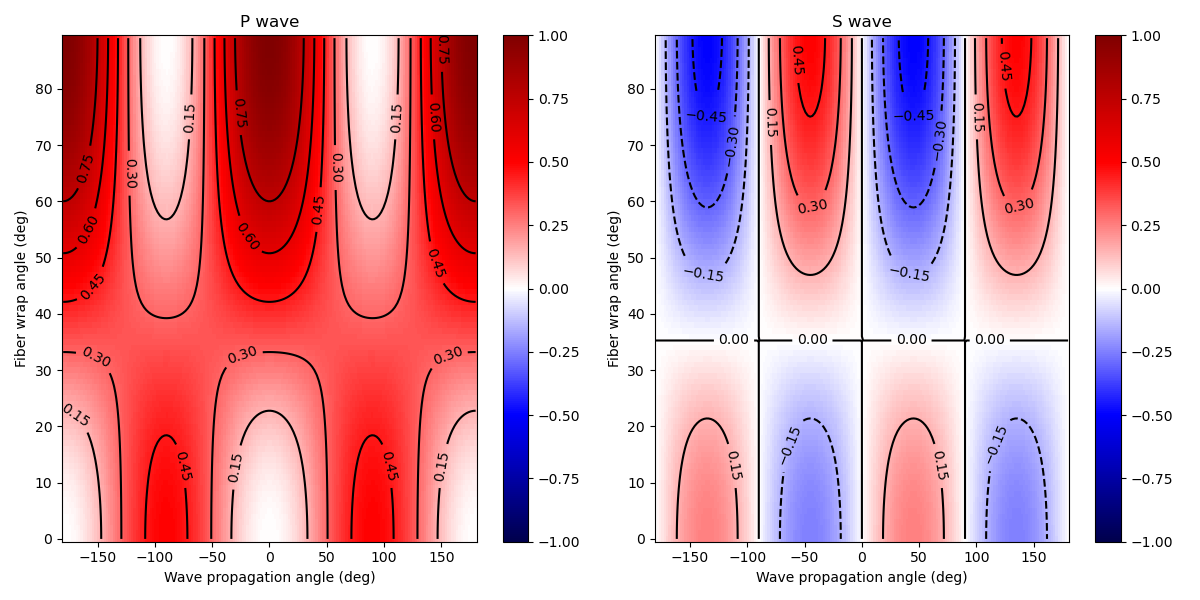

In [21]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
im1=ax[0].pcolormesh(theta,alpha,ehelixP,cmap='seismic',vmin=-1,vmax=1)
c1=ax[0].contour((th+np.pi/2)*180/np.pi,alpha,ehelixP,np.arange(0.15,0.9,0.15),colors='black')
ax[0].clabel(c1,c1.levels,inline=True)
ax[0].set_xlabel('Wave propagation angle (deg)')
ax[0].set_ylabel('Fiber wrap angle (deg)')
ax[0].set_title('P wave')
fig.colorbar(im1)
im2=ax[1].pcolormesh(theta,alpha,ehelixS,cmap='seismic',vmin=-1,vmax=1)
c2=ax[1].contour((th+np.pi/2)*180/np.pi,alpha,ehelixS,np.arange(0.15,0.9,0.15),colors='black')
c3=ax[1].contour((th+np.pi/2)*180/np.pi,alpha,ehelixS,np.flip(np.arange(0,-0.9,-0.15)),colors='black')
ax[1].clabel(c2,c2.levels,inline=True)
ax[1].clabel(c3,c3.levels,inline=True)
ax[1].set_xlabel('Wave propagation angle (deg)')
ax[1].set_ylabel('Fiber wrap angle (deg)')
ax[1].set_title('S wave')
fig.colorbar(im2)
fig.tight_layout()